# CLUSTERING

This notebook aim to find and extract the best clusters from the data.
1. Use K-Means algorithm to detect families groups with similar charatteristics.
2. Experiment with different similarity metrics or scale variables to optimize results.
3. View the clusters and interpret the results describing the main profiles.

In [1]:
import sys
import os
import import_ipynb

import numpy as np
import pandas as pd

SEED=48

In [2]:
# Add the folder containing "files.ipynb" to the Python path
sys.path.append(os.path.abspath("Utils"))

In [3]:
# Import the files notebook
import Utils.files as files

## IMPORT DATA

In [4]:
df = pd.read_csv("./Array_saved/X_without_null.csv")

In [5]:
df.head()

Gender AutonomousCommunity SchoolOwnership  KindOfPlace  LivingUnit  \
0     2.0          PAIS VASCO         Público          2.0           2   
1     2.0          PAIS VASCO         Público          2.0           2   
2     2.0          PAIS VASCO         Público          2.0           2   
3     2.0          PAIS VASCO      Concertado          2.0           2   
4     2.0          PAIS VASCO         Público          2.0           2   

   DependentPersons  WorkConfinement  WorkConfinementsSecondAdult  \
0                 0                1                          1.0   
1                 0                1                          1.0   
2                 1                1                          0.0   
3                 0                1                          1.0   
4                 0                0                          1.0   

   ChildEarlyEducation1  ChildEarlyEducation2  ...  SpaceGym  SpaceOther  \
0                     0                     1  ...         0           0   
1                     0                     1  ...         0           1   
2                     0                     1  ...         1           0   
3                     0                     0  ...         1           0   
4                     0                     1  ...         1           1   

   SpaceNone  SpaceStreet  SpacePlots  SpaceParks  SpacePublic  \
0          0            0           0           1            1   
1          0            0           0           1            0   
2          0            1           0           0            1   
3          0            0           1           1            0   
4          0            0           0           0            1   

   SpaceSurroundingOther  SpaceSurroundingNone  ActivitiesOutside  
0                      0                     0                2.0  
1                      0                     0                3.0  
2                      0                     0                3.0  
3                      0                     0                3.0  
4                      0                     0                2.0  

[5 rows x 108 columns]

### Transform String columns to numeric
This process will need after, when I'll show the representative instance for each cluster

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
oe = OrdinalEncoder().fit(df.loc[:, ["AutonomousCommunity"]])
df.AutonomousCommunity = oe.transform(df.loc[:, ["AutonomousCommunity"]])

In [8]:
# The encoding is made in order with the mode
oe.categories_[0]

array(['ANDALUCÍA', 'ARAGÓN', 'ASTURIAS', 'CANARIAS', 'CANTABRIA',
       'CASTILLA LA MANCHA', 'CASTILLA Y LEÓN', 'CATALUÑA', 'CEUTA',
       'COMUNIDAD VALENCIANA', 'EXTREMADURA', 'GALICIA', 'ILLES BALEARS',
       'LA RIOJA', 'MADRID', 'MELILLA', 'MURCIA', 'NAVARRA', 'PAIS VASCO'],
      dtype=object)

In [9]:
AutonomousCommunity_dict = {}

for key in range(0, len(oe.categories_[0])):
    AutonomousCommunity_dict[ key ] = oe.categories_[0][key]

In [10]:
AutonomousCommunity_dict

{0: 'ANDALUCÍA',
 1: 'ARAGÓN',
 2: 'ASTURIAS',
 3: 'CANARIAS',
 4: 'CANTABRIA',
 5: 'CASTILLA LA MANCHA',
 6: 'CASTILLA Y LEÓN',
 7: 'CATALUÑA',
 8: 'CEUTA',
 9: 'COMUNIDAD VALENCIANA',
 10: 'EXTREMADURA',
 11: 'GALICIA',
 12: 'ILLES BALEARS',
 13: 'LA RIOJA',
 14: 'MADRID',
 15: 'MELILLA',
 16: 'MURCIA',
 17: 'NAVARRA',
 18: 'PAIS VASCO'}

In [11]:
oe = OrdinalEncoder().fit(df.loc[:, ["SchoolOwnership"]])
df.SchoolOwnership = oe.transform(df.loc[:, ["SchoolOwnership"]])

In [12]:
oe.categories_

[array(['Concertado', 'Privado', 'Público'], dtype=object)]

In [13]:
SchoolOwnership_dict = {}

for key in range(0, len(oe.categories_[0])):
    SchoolOwnership_dict[ key ] = oe.categories_[0][key]

## ENCODING

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [15]:
# This list contains only features that are categorical/nominal
nominal_col = list( df.loc[:, 'Gender':'ChildrenSpecialNeeds'].columns.drop('LivingUnit') )
nominal_col.extend( list( df.loc[:, 'WorkloadChange':'HouseworkMore'].columns ) )
nominal_col.extend( list( df.loc[:, 'Reconciling':'InterruptChildren'].columns ) )
nominal_col.extend( list( df.loc[:, 'Bedtime':'ChildMissTeacher'].columns ) )
nominal_col.extend( list( df.loc[:, 'ChallengeContent':'ChallengeAny'].columns ) )
nominal_col.extend( list( df.loc[:, 'FamiliesCollaboration':'ActivitiesOutside'].columns ) )

# This list contains only features that are categorical/ordinal
ordinal_col = list(["LivingUnit"])
ordinal_col.extend( list( df.loc[:, 'Sleep':'Sex'].columns ) )
ordinal_col.extend( list( df.loc[:, 'InterruptChildrenFrequency':'ChildrenSchookwork'].columns ) )
ordinal_col.extend( list( df.loc[:, 'HelpOnline':'ParentsCommunicationReturn'].columns ) )
ordinal_col.extend( list( df.loc[:, 'PriorityCustody':'PriorityEmotional'].columns ) )

In [16]:
transformer = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(), nominal_col)
], sparse_threshold=0, remainder="passthrough")

In [17]:
X_transformed = pd.DataFrame(transformer.fit_transform( df ), columns=transformer.get_feature_names_out())

In [18]:
X_transformed.head()

ohe__Gender_1.0  ohe__Gender_2.0  ohe__AutonomousCommunity_0.0  \
0              0.0              1.0                           0.0   
1              0.0              1.0                           0.0   
2              0.0              1.0                           0.0   
3              0.0              1.0                           0.0   
4              0.0              1.0                           0.0   

   ohe__AutonomousCommunity_1.0  ohe__AutonomousCommunity_2.0  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   ohe__AutonomousCommunity_3.0  ohe__AutonomousCommunity_4.0  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   ohe__AutonomousCommunity_5.0  ohe__AutonomousCommunity_6.0  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   ohe__AutonomousCommunity_7.0  ...  remainder__ChildrenSchookwork  \
0                           0.0  ...                            2.0   
1                           0.0  ...                            2.0   
2                           0.0  ...                            2.0   
3                           0.0  ...                            2.0   
4                           0.0  ...                            2.0   

   remainder__HelpOnline  remainder__SchoolCommunication  \
0                    4.0                             2.0   
1                    2.0                             2.0   
2                    4.0                             2.0   
3                    3.0                             3.0   
4                    2.0                             3.0   

   remainder__ParentsGroups  remainder__ParentsCommunicationReturn  \
0                       3.0                                    2.0   
1                       4.0                                    2.0   
2                       3.0                                    3.0   
3                       4.0                                    2.0   
4                       3.0                                    2.0   

   remainder__PriorityCustody  remainder__PriorityContent  \
0                         1.0                         3.0   
1                         2.0                         3.0   
2                         3.0                         1.0   
3                         2.0                         2.0   
4                         1.0                         3.0   

   remainder__PriorityAutonomy  remainder__PrioritySocialisation  \
0                          3.0                               2.0   
1                          2.0                               2.0   
2                          3.0                               3.0   
3                          3.0                               3.0   
4                          3.0                               3.0   

   remainder__PriorityEmotional  
0                           2.0  
1                           2.0  
2                           3.0  
3                           3.0  
4                           3.0  

[5 rows x 230 columns]

In [19]:
X_transformed.to_csv(path_or_buf="./Array_saved/X_embedded.csv", index=False)

## Dimensionality Reduction

In [20]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
import umap

d:\Università\Magistrale-Data Science\Data Mining\LAB\TheConsequencesOfCovid19\DataMiningEnv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
pca = PCA(n_components=2, random_state=SEED)
Kpca = KernelPCA(n_components=2, random_state=SEED, kernel='rbf', gamma=0.1)
tsne = TSNE(n_components=2, random_state=SEED)
reducer = umap.UMAP()

X_pca = pca.fit_transform(X_transformed)
X_Kpca = Kpca.fit_transform(X_transformed)
X_tsne = tsne.fit_transform(X_transformed)
X_umap = reducer.fit_transform(X_transformed)

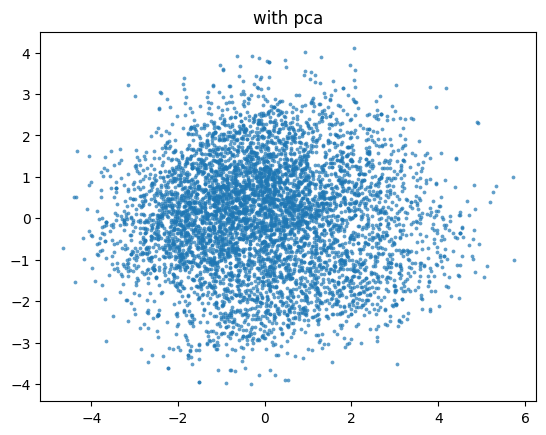

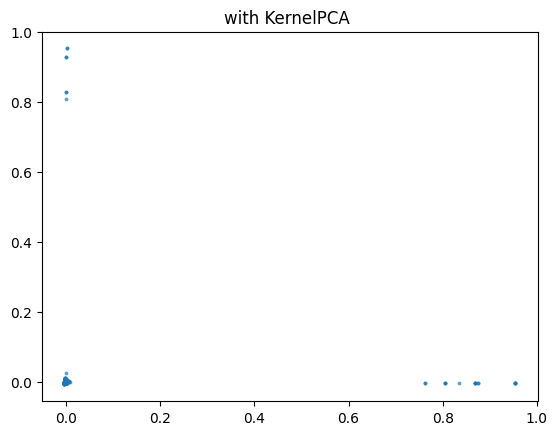

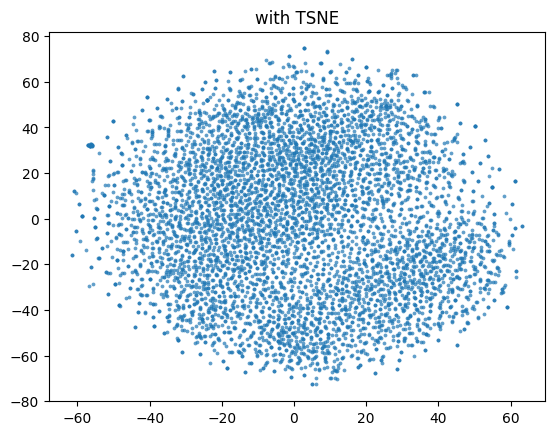

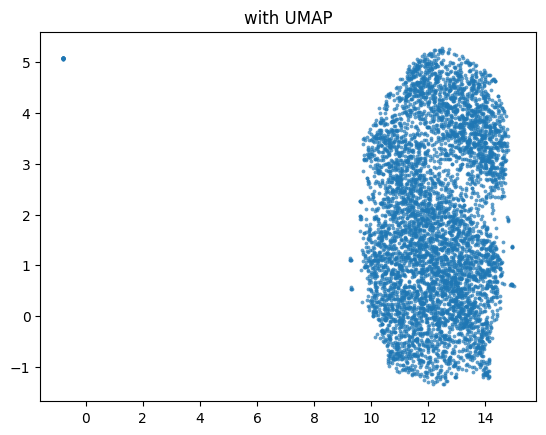

In [22]:
plt.figure(1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7)
plt.title("with pca")

plt.figure(2)
plt.scatter(X_Kpca[:, 0], X_Kpca[:, 1], marker=".", s=30, lw=0, alpha=0.7)
plt.title("with KernelPCA ")

plt.figure(3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], marker=".", s=30, lw=0, alpha=0.7)
plt.title("with TSNE")

plt.figure(4)
plt.scatter(X_umap[:, 0], X_umap[:, 1], marker=".", s=30, lw=0, alpha=0.7)
plt.title("with UMAP")

plt.show()

## K-Means

In [23]:
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [24]:
def make_KMeans (X, X_decomp, min_cluster=2, max_cluster=4):

    labels_matrix = np.ndarray((X.shape[0], max_cluster-min_cluster+1))
    index = 0

    for n_clusters in range(min_cluster, max_cluster+1):
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 48 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=SEED)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)


        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X_decomp[:, 0], X_decomp[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_ # TODO: attenzione i centri sono vettori con più di 2 feature 
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

        labels_matrix[:, index] = cluster_labels
        index += 1

    plt.show()

    return labels_matrix

### With PCA

For n_clusters = 2 The average silhouette_score is : 0.04224311324921307
For n_clusters = 3 The average silhouette_score is : 0.036107088411180065
For n_clusters = 4 The average silhouette_score is : 0.0319429027452773


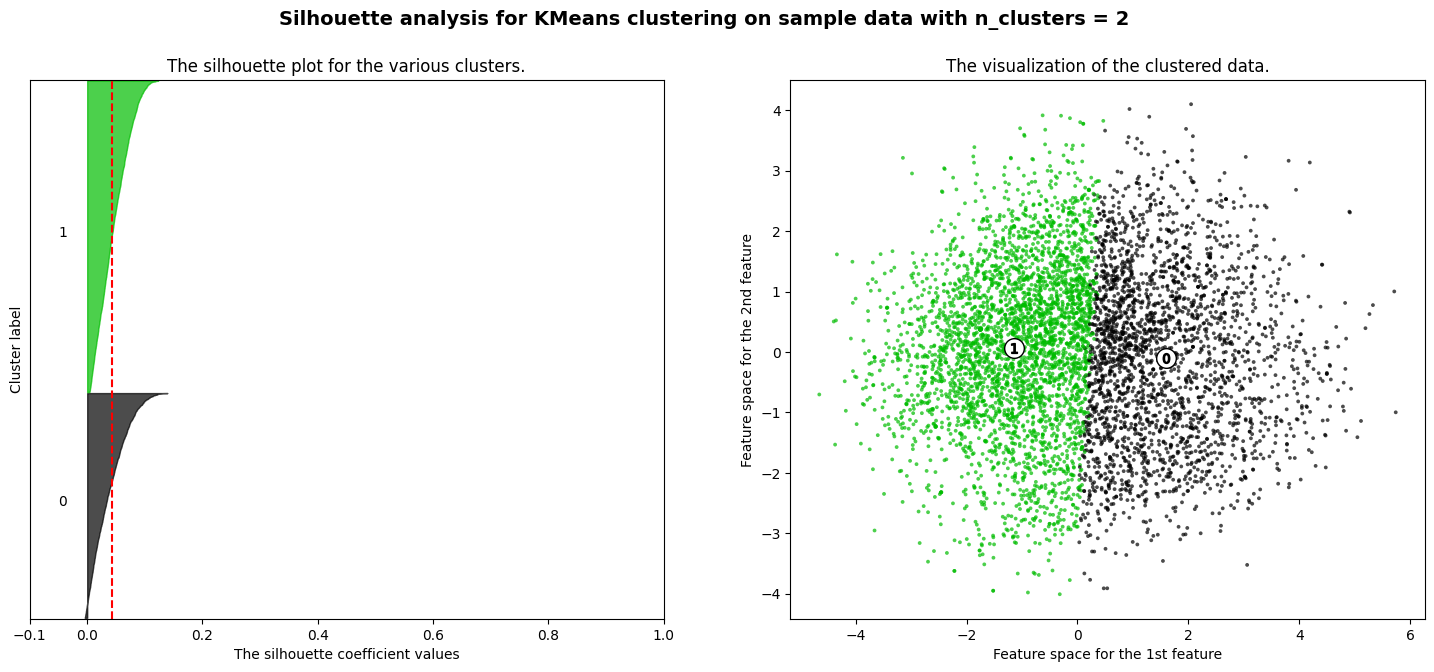

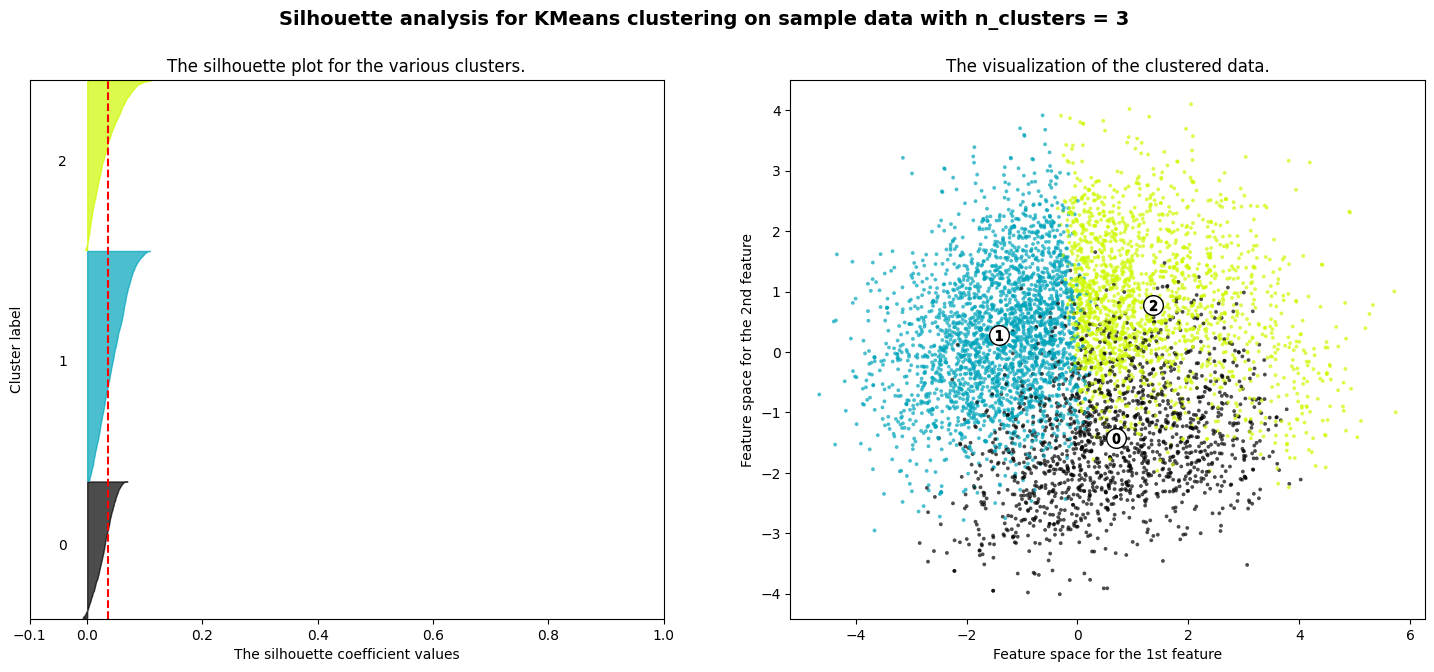

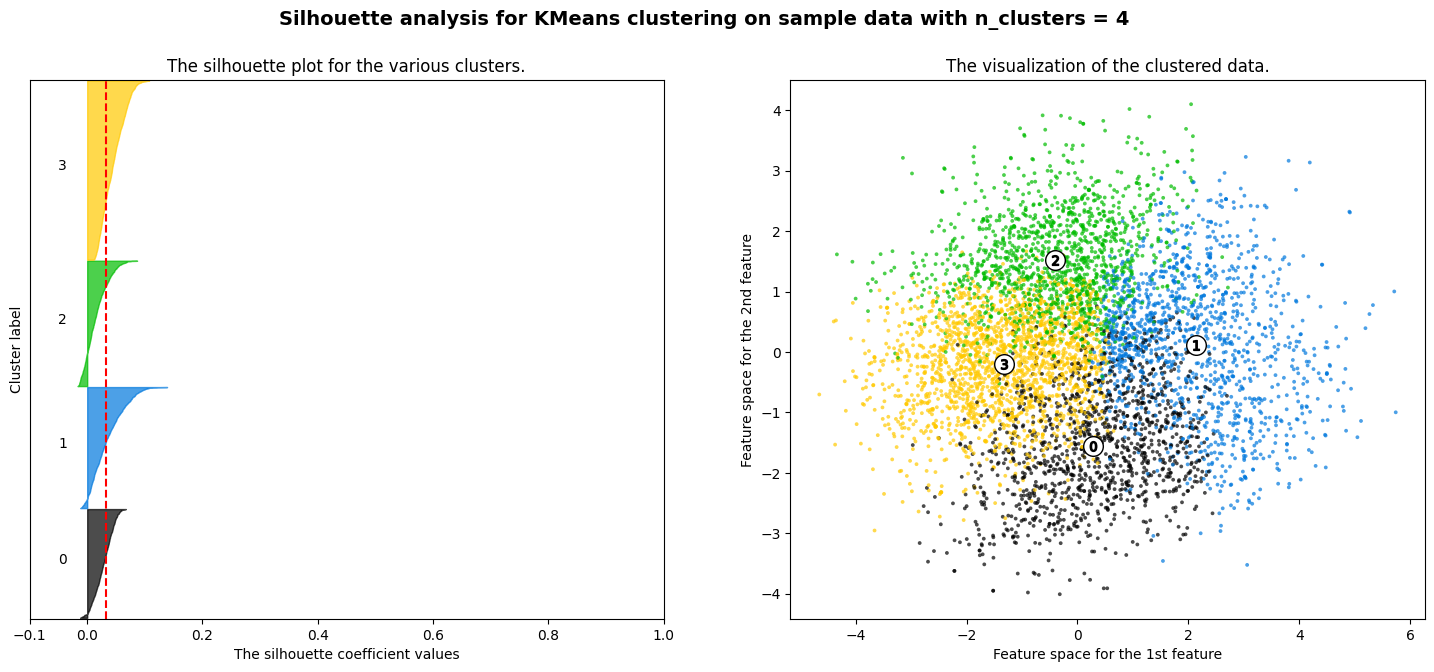

In [25]:
# TEMPORARY
pca = PCA(n_components=0.99, random_state=SEED)
X_reducted = pca.fit_transform(X_transformed)

labels_matrix = make_KMeans(X_reducted, X_pca)

In [26]:
NUM_RAP = 3

# Select labels for first configuration (number of cluster selected)
label = labels_matrix[:, NUM_RAP-2]
# Create a matrix where each rows rappresents an 
rappresentative_istance = np.ndarray( (NUM_RAP, df.shape[1]) )

for i in range(0, NUM_RAP ):

    # For each cluster take the mode instance
    rappresentative_istance[i, :] = df.loc[label==i, :].mode()

In [27]:
rappresentative_istance = pd.DataFrame(rappresentative_istance, columns=df.columns)
# Map the String values
rappresentative_istance.loc[:, "AutonomousCommunity"] = rappresentative_istance.loc[:, "AutonomousCommunity"].map(AutonomousCommunity_dict)
rappresentative_istance.loc[:, "SchoolOwnership"] = rappresentative_istance.loc[:, "SchoolOwnership"].map(SchoolOwnership_dict)

rappresentative_istance

C:\Users\gabry\AppData\Local\Temp\ipykernel_23960\3393922528.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['COMUNIDAD VALENCIANA' 'COMUNIDAD VALENCIANA' 'COMUNIDAD VALENCIANA']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rappresentative_istance.loc[:, "AutonomousCommunity"] = rappresentative_istance.loc[:, "AutonomousCommunity"].map(AutonomousCommunity_dict)
C:\Users\gabry\AppData\Local\Temp\ipykernel_23960\3393922528.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Público' 'Público' 'Público']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rappresentative_istance.loc[:, "SchoolOwnership"] = rappresentative_istance.loc[:, "SchoolOwnership"].map(SchoolOwnership_dict)


Gender   AutonomousCommunity SchoolOwnership  KindOfPlace  LivingUnit  \
0     2.0  COMUNIDAD VALENCIANA         Público          2.0         2.0   
1     2.0  COMUNIDAD VALENCIANA         Público          2.0         2.0   
2     2.0  COMUNIDAD VALENCIANA         Público          2.0         2.0   

   DependentPersons  WorkConfinement  WorkConfinementsSecondAdult  \
0               0.0              0.0                          1.0   
1               0.0              1.0                          1.0   
2               0.0              1.0                          1.0   

   ChildEarlyEducation1  ChildEarlyEducation2  ...  SpaceGym  SpaceOther  \
0                   0.0                   0.0  ...       1.0         0.0   
1                   0.0                   0.0  ...       1.0         0.0   
2                   0.0                   1.0  ...       1.0         0.0   

   SpaceNone  SpaceStreet  SpacePlots  SpaceParks  SpacePublic  \
0        0.0          0.0         0.0         0.0          1.0   
1        0.0          0.0         0.0         0.0          1.0   
2        0.0          0.0         0.0         0.0          1.0   

   SpaceSurroundingOther  SpaceSurroundingNone  ActivitiesOutside  
0                    0.0                   0.0                3.0  
1                    0.0                   0.0                3.0  
2                    0.0                   0.0                3.0  

[3 rows x 108 columns]

In [28]:
# Show only the column with different values
mask_col_different = (rappresentative_istance.iloc[0, :] != rappresentative_istance.iloc[1, :]) | (rappresentative_istance.iloc[1, :] != rappresentative_istance.iloc[2, :])
rappresentative_istance.loc[:, mask_col_different]

WorkConfinement  ChildEarlyEducation2  WorkloadChange  Sleep  Leisure  \
0              0.0                   0.0             7.0    2.0      2.0   
1              1.0                   0.0             3.0    2.0      1.0   
2              1.0                   1.0             3.0    3.0      2.0   

   Sports  Friends  ExtendedFamily  Future  Sex  ...  \
0     1.0      2.0             3.0     3.0  3.0  ...   
1     1.0      2.0             2.0     3.0  2.0  ...   
2     4.0      3.0             3.0     4.0  3.0  ...   

   InterruptChildrenFrequency  Bedtime  Anxiety  TechnologyUse  \
0                         0.0      0.0      1.0            1.0   
1                         3.0      1.0      1.0            1.0   
2                         2.0      1.0      0.0            0.0   

   ChildPhysicalActivity  Irritability  Boredom  ChildMissTeacher  \
0                    1.0           1.0      1.0               0.0   
1                    1.0           1.0      1.0               1.0   
2                    0.0           0.0      0.0               0.0   

   PriorityCustody  SpacePorch  
0              3.0         0.0  
1              3.0         0.0  
2              2.0         1.0  

[3 rows x 22 columns]

### With Kernel-PCA

For n_clusters = 2 The average silhouette_score is : 0.9963420128707496
For n_clusters = 3 The average silhouette_score is : 0.9982611492341075


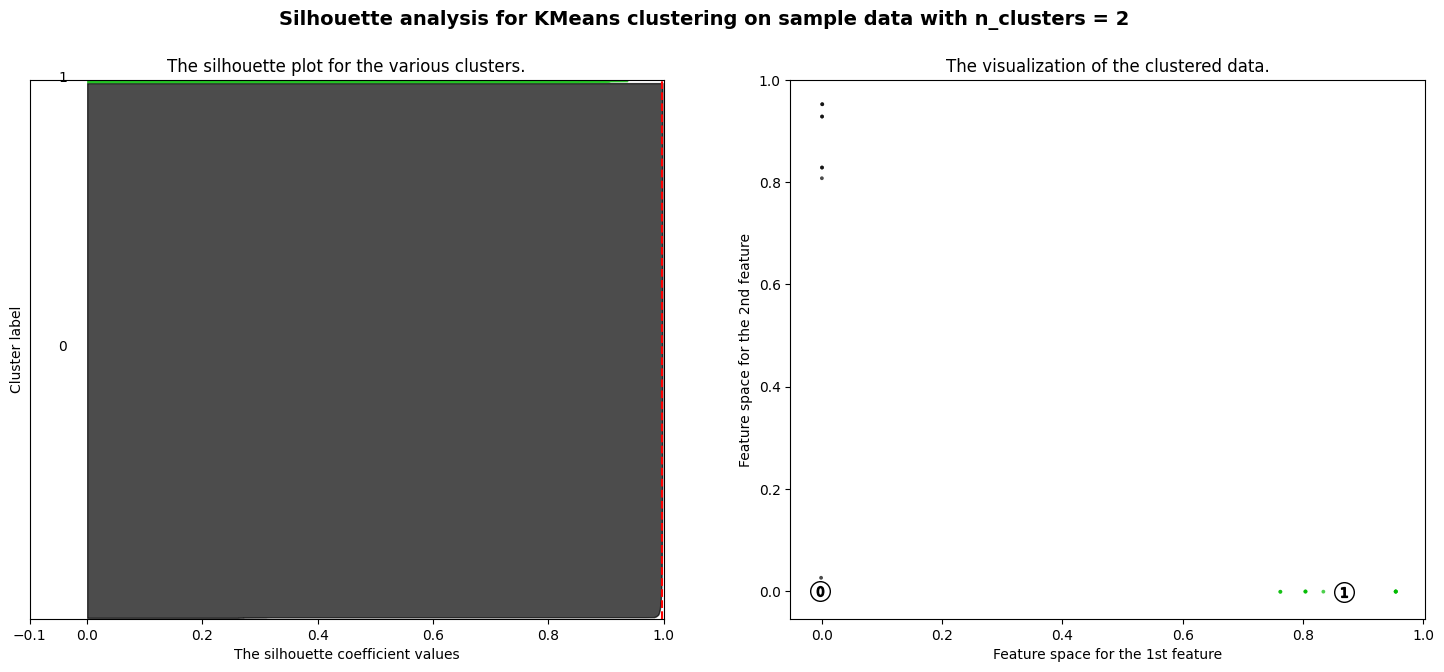

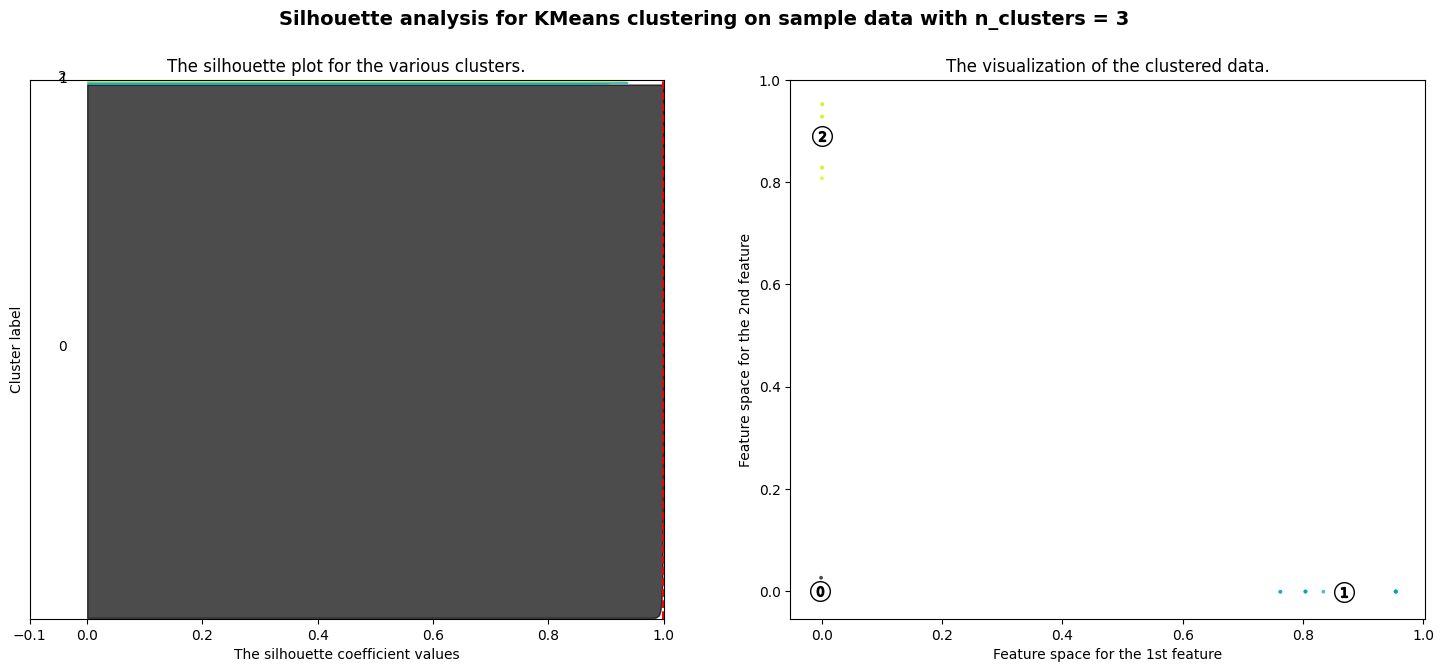

In [29]:
labels_matrix = make_KMeans(X_Kpca, X_Kpca, min_cluster=2, max_cluster=3)

In [30]:
NUM_RAP = 3

# Select labels for first configuration (number of cluster selected
label = labels_matrix[:, NUM_RAP-2]
# Create a matrix where each rows rappresents an 
rappresentative_istance = np.ndarray( (NUM_RAP, df.shape[1]) )

for i in range(0, NUM_RAP ):

    # For each cluster take the mode instance
    rappresentative_istance[i, :] = df.loc[label==i, :].mode()

In [31]:
rappresentative_istance = pd.DataFrame(rappresentative_istance, columns=df.columns)
# Map the String values
rappresentative_istance.loc[:, "AutonomousCommunity"] = rappresentative_istance.loc[:, "AutonomousCommunity"].map(AutonomousCommunity_dict)
rappresentative_istance.loc[:, "SchoolOwnership"] = rappresentative_istance.loc[:, "SchoolOwnership"].map(SchoolOwnership_dict)

rappresentative_istance

C:\Users\gabry\AppData\Local\Temp\ipykernel_23960\3393922528.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['COMUNIDAD VALENCIANA' 'COMUNIDAD VALENCIANA' 'COMUNIDAD VALENCIANA']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rappresentative_istance.loc[:, "AutonomousCommunity"] = rappresentative_istance.loc[:, "AutonomousCommunity"].map(AutonomousCommunity_dict)
C:\Users\gabry\AppData\Local\Temp\ipykernel_23960\3393922528.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Público' 'Público' 'Privado']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rappresentative_istance.loc[:, "SchoolOwnership"] = rappresentative_istance.loc[:, "SchoolOwnership"].map(SchoolOwnership_dict)


Gender   AutonomousCommunity SchoolOwnership  KindOfPlace  LivingUnit  \
0     2.0  COMUNIDAD VALENCIANA         Público          2.0         2.0   
1     2.0  COMUNIDAD VALENCIANA         Público          0.0         2.0   
2     2.0  COMUNIDAD VALENCIANA         Privado          1.0         2.0   

   DependentPersons  WorkConfinement  WorkConfinementsSecondAdult  \
0               0.0              1.0                          1.0   
1               0.0              1.0                          1.0   
2               0.0              0.0                          1.0   

   ChildEarlyEducation1  ChildEarlyEducation2  ...  SpaceGym  SpaceOther  \
0                   0.0                   0.0  ...       1.0         0.0   
1                   0.0                   0.0  ...       0.0         0.0   
2                   0.0                   0.0  ...       0.0         0.0   

   SpaceNone  SpaceStreet  SpacePlots  SpaceParks  SpacePublic  \
0        0.0          0.0         0.0         0.0          1.0   
1        0.0          0.0         0.0         0.0          1.0   
2        0.0          0.0         0.0         0.0          0.0   

   SpaceSurroundingOther  SpaceSurroundingNone  ActivitiesOutside  
0                    0.0                   0.0                3.0  
1                    0.0                   0.0                3.0  
2                    0.0                   1.0                1.0  

[3 rows x 108 columns]

In [32]:
# Show only the column with different values
mask_col_different = (rappresentative_istance.iloc[0, :] != rappresentative_istance.iloc[1, :]) | (rappresentative_istance.iloc[1, :] != rappresentative_istance.iloc[2, :])
rappresentative_istance.loc[:, mask_col_different]

SchoolOwnership  KindOfPlace  WorkConfinement  ChildPrimaryEducation  \
0         Público          2.0              1.0                    0.0   
1         Público          0.0              1.0                    1.0   
2         Privado          1.0              0.0                    1.0   

   WorkloadChange  Leisure  Friends  ExtendedFamily  Future  Sex  ...  \
0             3.0      2.0      2.0             3.0     3.0  3.0  ...   
1             4.0      1.0      1.0             2.0     4.0  1.0  ...   
2             7.0      1.0      2.0             4.0     3.0  1.0  ...   

   ChallengeOnline  PriorityCustody  PriorityContent  SchoolSpace  \
0              0.0              3.0              3.0          1.0   
1              1.0              3.0              3.0          1.0   
2              1.0              2.0              2.0          3.0   

   SpaceBarracks  SpaceDining  SpaceGym  SpacePublic  SpaceSurroundingNone  \
0            0.0          0.0       1.0          1.0                   0.0   
1            1.0          0.0       0.0          1.0                   0.0   
2            0.0          1.0       0.0          0.0                   1.0   

   ActivitiesOutside  
0                3.0  
1                3.0  
2                1.0  

[3 rows x 40 columns]

### With TSNE

For n_clusters = 2 The average silhouette_score is : 0.3928999
For n_clusters = 3 The average silhouette_score is : 0.3893066
For n_clusters = 4 The average silhouette_score is : 0.3701994


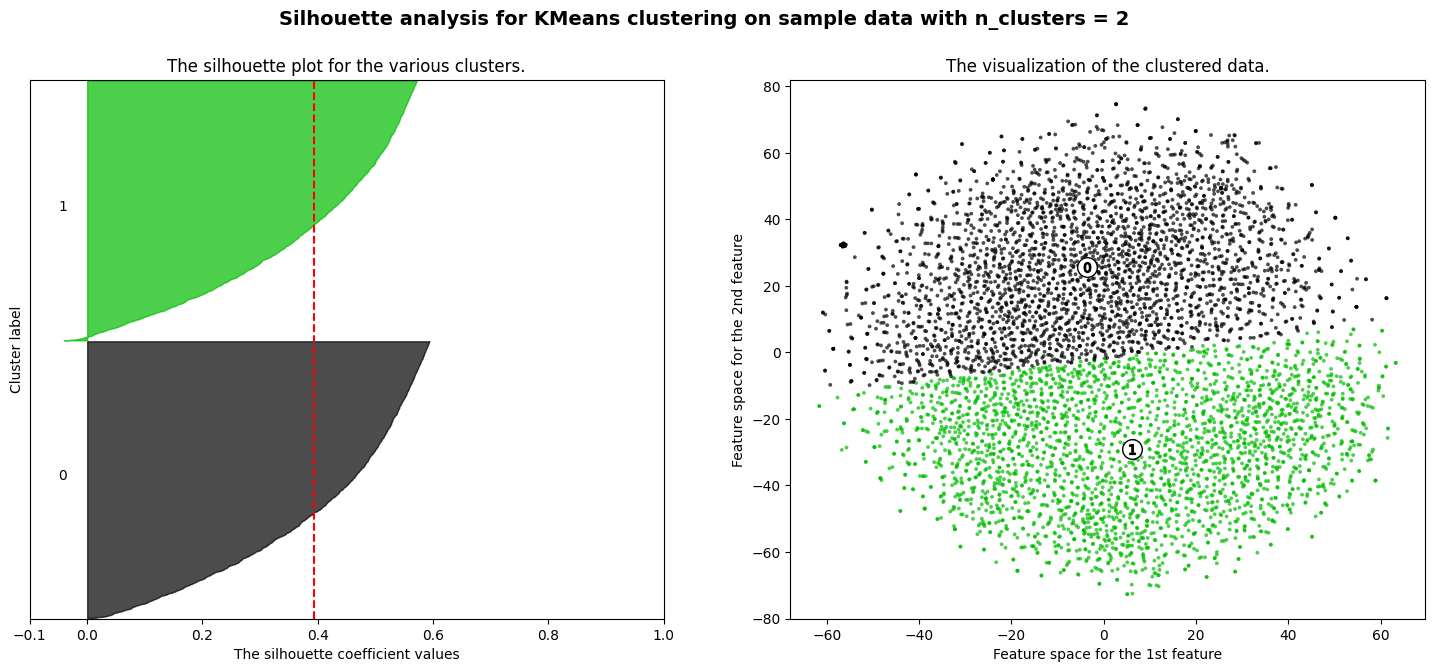

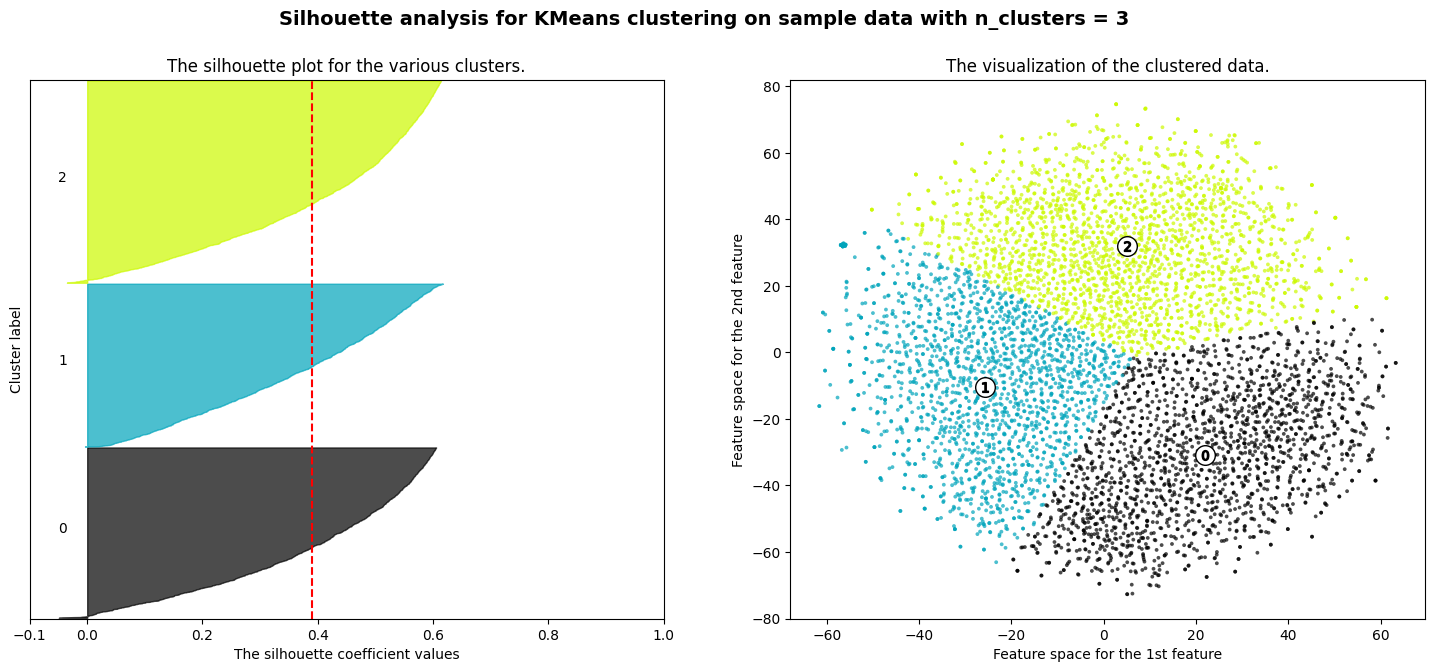

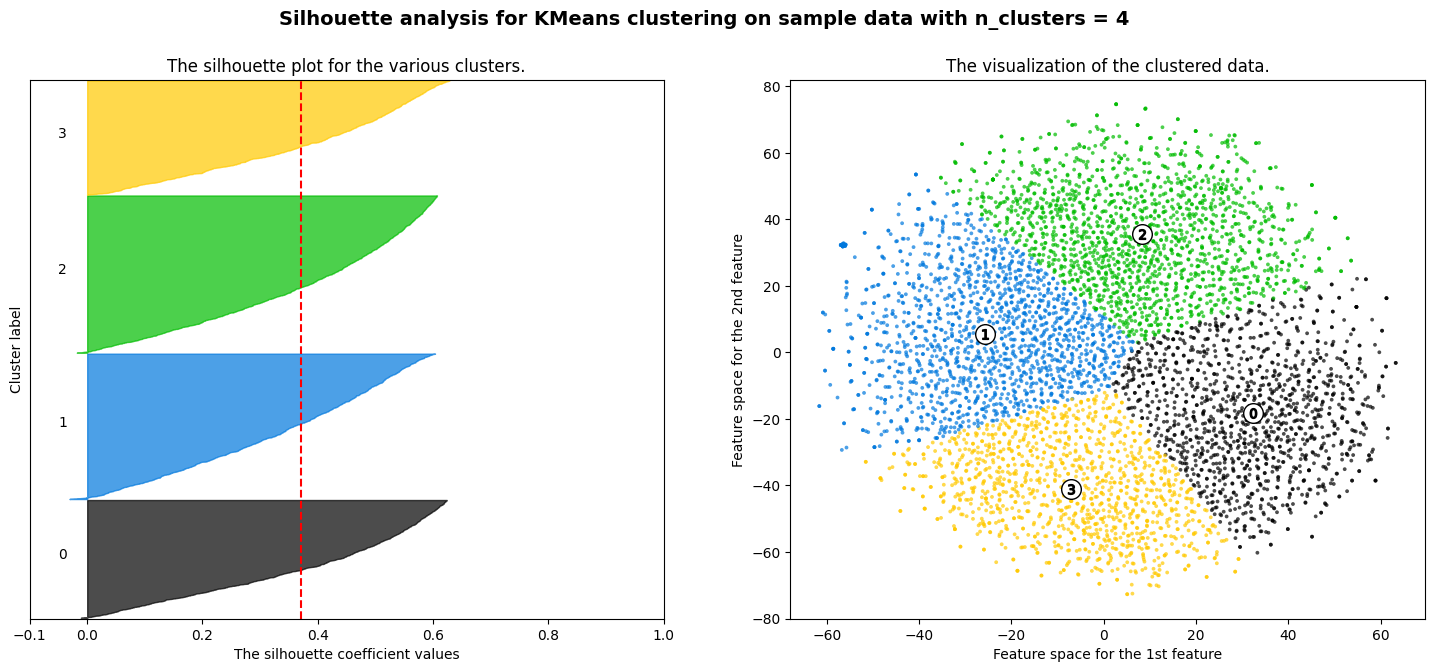

In [33]:
labels_matrix = make_KMeans(X_tsne, X_tsne)

In [34]:
NUM_RAP = 3

# Select labels for first configuration (number of cluster selected)
label = labels_matrix[:, NUM_RAP-2]
# Create a matrix where each rows rappresents an 
rappresentative_istance = np.ndarray( (NUM_RAP, df.shape[1]) )

for i in range(0, NUM_RAP ):

    # For each cluster take the mode instance
    rappresentative_istance[i, :] = df.loc[label==i, :].mode()

In [35]:
rappresentative_istance = pd.DataFrame(rappresentative_istance, columns=df.columns)
# Map the String values
rappresentative_istance.loc[:, "AutonomousCommunity"] = rappresentative_istance.loc[:, "AutonomousCommunity"].map(AutonomousCommunity_dict)
rappresentative_istance.loc[:, "SchoolOwnership"] = rappresentative_istance.loc[:, "SchoolOwnership"].map(SchoolOwnership_dict)

rappresentative_istance

C:\Users\gabry\AppData\Local\Temp\ipykernel_23960\3393922528.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['COMUNIDAD VALENCIANA' 'COMUNIDAD VALENCIANA' 'COMUNIDAD VALENCIANA']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rappresentative_istance.loc[:, "AutonomousCommunity"] = rappresentative_istance.loc[:, "AutonomousCommunity"].map(AutonomousCommunity_dict)
C:\Users\gabry\AppData\Local\Temp\ipykernel_23960\3393922528.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Público' 'Público' 'Público']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rappresentative_istance.loc[:, "SchoolOwnership"] = rappresentative_istance.loc[:, "SchoolOwnership"].map(SchoolOwnership_dict)


Gender   AutonomousCommunity SchoolOwnership  KindOfPlace  LivingUnit  \
0     2.0  COMUNIDAD VALENCIANA         Público          2.0         2.0   
1     2.0  COMUNIDAD VALENCIANA         Público          2.0         2.0   
2     2.0  COMUNIDAD VALENCIANA         Público          2.0         2.0   

   DependentPersons  WorkConfinement  WorkConfinementsSecondAdult  \
0               0.0              0.0                          1.0   
1               0.0              1.0                          1.0   
2               0.0              1.0                          1.0   

   ChildEarlyEducation1  ChildEarlyEducation2  ...  SpaceGym  SpaceOther  \
0                   0.0                   0.0  ...       1.0         0.0   
1                   0.0                   1.0  ...       1.0         0.0   
2                   0.0                   0.0  ...       1.0         0.0   

   SpaceNone  SpaceStreet  SpacePlots  SpaceParks  SpacePublic  \
0        0.0          0.0         0.0         0.0          1.0   
1        0.0          0.0         0.0         0.0          1.0   
2        0.0          0.0         0.0         0.0          1.0   

   SpaceSurroundingOther  SpaceSurroundingNone  ActivitiesOutside  
0                    0.0                   0.0                3.0  
1                    0.0                   0.0                3.0  
2                    0.0                   0.0                3.0  

[3 rows x 108 columns]

In [36]:
# Show only the column with different values
mask_col_different = (rappresentative_istance.iloc[0, :] != rappresentative_istance.iloc[1, :]) | (rappresentative_istance.iloc[1, :] != rappresentative_istance.iloc[2, :])
rappresentative_istance.loc[:, mask_col_different]

WorkConfinement  ChildEarlyEducation2  WorkloadChange  Leisure  Sports  \
0              0.0                   0.0             7.0      2.0     1.0   
1              1.0                   1.0             3.0      2.0     2.0   
2              1.0                   0.0             3.0      1.0     1.0   

   ExtendedFamily  Future  Sex  InterruptChildren  InterruptChildrenFrequency  \
0             3.0     3.0  3.0                0.0                         0.0   
1             3.0     3.0  3.0                1.0                         2.0   
2             2.0     4.0  2.0                1.0                         3.0   

   ...  Adaptarion  Anxiety  TechnologyUse  ChildPhysicalActivity  \
0  ...         1.0      1.0            1.0                    1.0   
1  ...         1.0      0.0            0.0                    0.0   
2  ...         0.0      1.0            1.0                    1.0   

   Irritability  Boredom  ChildLeavingHome  ChildMissTeacher  PriorityCustody  \
0           0.0      1.0               1.0               1.0              3.0   
1           0.0      0.0               0.0               0.0              2.0   
2           1.0      1.0               1.0               1.0              3.0   

   SpacePorch  
0         0.0  
1         1.0  
2         0.0  

[3 rows x 22 columns]

### With UMAP

For n_clusters = 2 The average silhouette_score is : 0.4188228
For n_clusters = 3 The average silhouette_score is : 0.3973407
For n_clusters = 4 The average silhouette_score is : 0.3878589


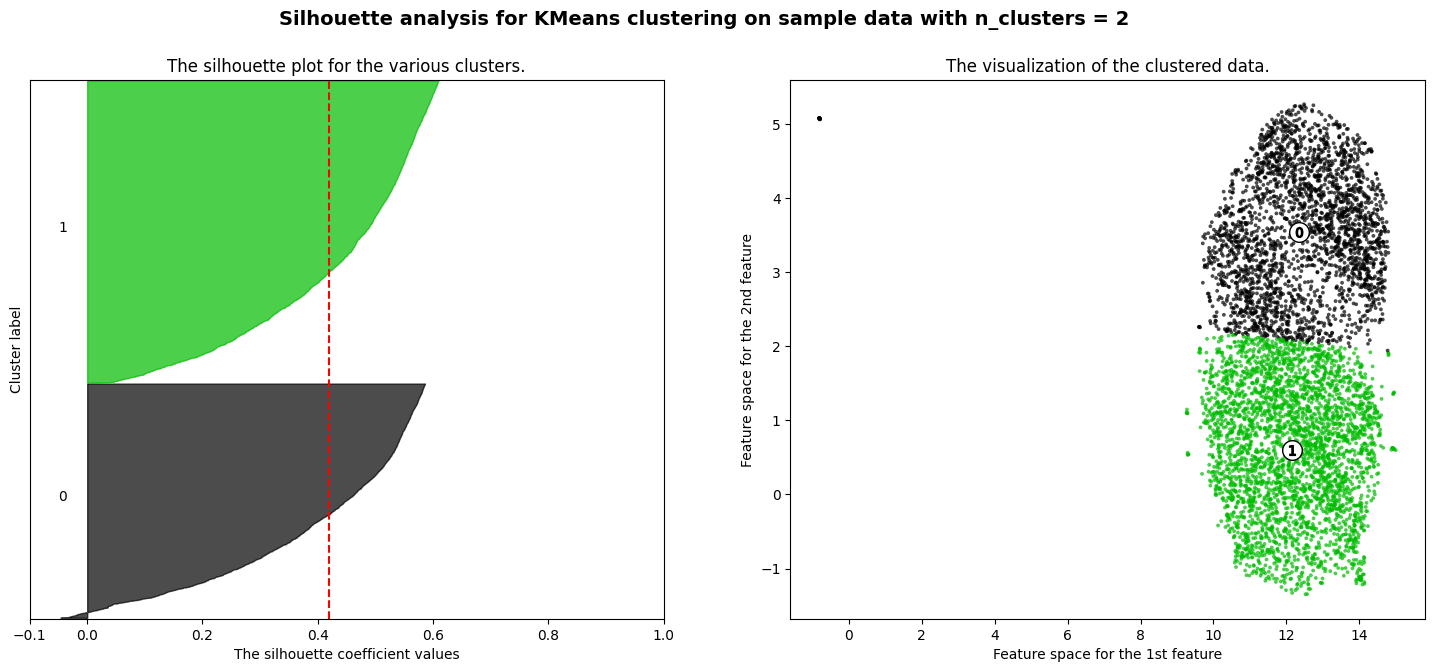

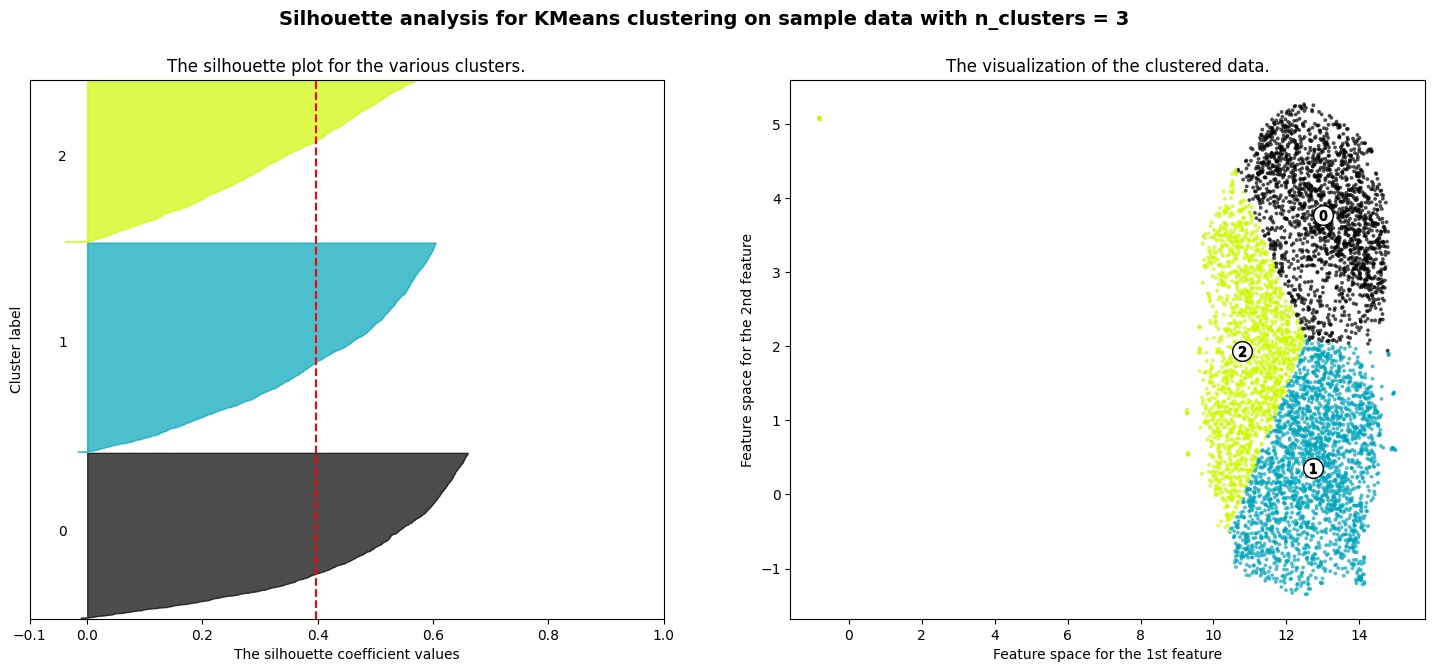

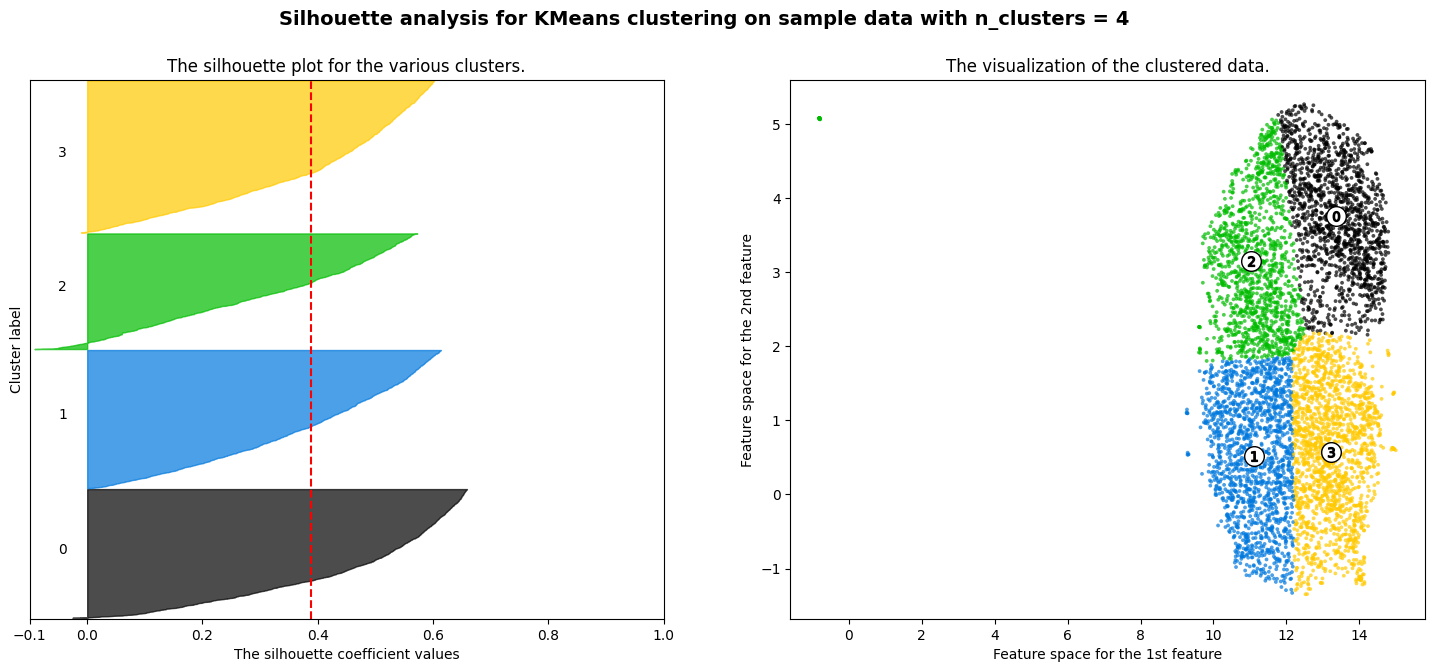

In [37]:
labels_matrix = make_KMeans(X_umap, X_umap)

In [38]:
NUM_RAP = 3

# Select labels for first configuration (number of cluster selected)
label = labels_matrix[:, NUM_RAP-2]
# Create a matrix where each rows rappresents an 
rappresentative_istance = np.ndarray( (NUM_RAP, df.shape[1]) )

for i in range(0, NUM_RAP ):

    # For each cluster take the mode instance
    rappresentative_istance[i, :] = df.loc[label==i, :].mode()

In [39]:
rappresentative_istance = pd.DataFrame(rappresentative_istance, columns=df.columns)
# Map the String values
rappresentative_istance.loc[:, "AutonomousCommunity"] = rappresentative_istance.loc[:, "AutonomousCommunity"].map(AutonomousCommunity_dict)
rappresentative_istance.loc[:, "SchoolOwnership"] = rappresentative_istance.loc[:, "SchoolOwnership"].map(SchoolOwnership_dict)

rappresentative_istance

C:\Users\gabry\AppData\Local\Temp\ipykernel_23960\3393922528.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['COMUNIDAD VALENCIANA' 'COMUNIDAD VALENCIANA' 'COMUNIDAD VALENCIANA']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rappresentative_istance.loc[:, "AutonomousCommunity"] = rappresentative_istance.loc[:, "AutonomousCommunity"].map(AutonomousCommunity_dict)
C:\Users\gabry\AppData\Local\Temp\ipykernel_23960\3393922528.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Público' 'Público' 'Público']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rappresentative_istance.loc[:, "SchoolOwnership"] = rappresentative_istance.loc[:, "SchoolOwnership"].map(SchoolOwnership_dict)


Gender   AutonomousCommunity SchoolOwnership  KindOfPlace  LivingUnit  \
0     2.0  COMUNIDAD VALENCIANA         Público          2.0         2.0   
1     2.0  COMUNIDAD VALENCIANA         Público          2.0         2.0   
2     2.0  COMUNIDAD VALENCIANA         Público          2.0         2.0   

   DependentPersons  WorkConfinement  WorkConfinementsSecondAdult  \
0               0.0              0.0                          1.0   
1               0.0              1.0                          1.0   
2               0.0              1.0                          1.0   

   ChildEarlyEducation1  ChildEarlyEducation2  ...  SpaceGym  SpaceOther  \
0                   0.0                   0.0  ...       1.0         0.0   
1                   0.0                   0.0  ...       1.0         0.0   
2                   0.0                   1.0  ...       1.0         0.0   

   SpaceNone  SpaceStreet  SpacePlots  SpaceParks  SpacePublic  \
0        0.0          0.0         0.0         0.0          1.0   
1        0.0          0.0         0.0         0.0          1.0   
2        0.0          0.0         0.0         0.0          1.0   

   SpaceSurroundingOther  SpaceSurroundingNone  ActivitiesOutside  
0                    0.0                   0.0                3.0  
1                    0.0                   0.0                3.0  
2                    0.0                   0.0                3.0  

[3 rows x 108 columns]

In [40]:
# Show only the column with different values
mask_col_different = (rappresentative_istance.iloc[0, :] != rappresentative_istance.iloc[1, :]) | (rappresentative_istance.iloc[1, :] != rappresentative_istance.iloc[2, :]) 
different_columns = rappresentative_istance.loc[:, mask_col_different]

In [41]:
different_columns

WorkConfinement  ChildEarlyEducation2  WorkloadChange  Leisure  Sports  \
0              0.0                   0.0             7.0      2.0     1.0   
1              1.0                   0.0             3.0      1.0     1.0   
2              1.0                   1.0             3.0      2.0     2.0   

   ExtendedFamily  Future  Sex  InterruptChildren  InterruptChildrenFrequency  \
0             3.0     3.0  3.0                0.0                         0.0   
1             2.0     3.0  2.0                1.0                         3.0   
2             3.0     4.0  3.0                1.0                         2.0   

   ...  Adaptarion  Anxiety  ChildPhysicalActivity  Irritability  Boredom  \
0  ...         1.0      1.0                    1.0           0.0      1.0   
1  ...         0.0      1.0                    1.0           1.0      1.0   
2  ...         1.0      0.0                    0.0           0.0      0.0   

   ChildLeavingHome  ChildMissTeacher  ChallengeAny  PriorityCustody  \
0               0.0               0.0           1.0              3.0   
1               1.0               1.0           0.0              3.0   
2               0.0               1.0           0.0              2.0   

   SpacePorch  
0         0.0  
1         0.0  
2         1.0  

[3 rows x 22 columns]